In [214]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os
import shutil 

In [215]:
os.makedirs("AnalysisprojectAdvayShinde/data", exist_ok=True)

In [216]:
os.listdir()

['.zshrc.save',
 '.config',
 'Music',
 'learningdart',
 'FinancePredictor .ipynb',
 '.zprofile.pysave',
 'MainDir',
 '.skiko',
 '.condarc',
 'Cisco Packet Tracer 8.2.2',
 'filename.png',
 '.docker',
 'original.txt',
 'Untitled1.ipynb',
 'SkinPrj.ipynb',
 'go',
 '.DS_Store',
 'WealthWise-',
 '.CFUserTextEncoding',
 'AnalysisprojectAdvayShinde',
 'opencv-env',
 '.xonshrc',
 'Maching Learning path',
 'cockroach-data',
 '.hawtjni',
 'Untitled.ipynb',
 '.vscode-cli',
 '.zshrc',
 'configtxn.yaml',
 '.packettracer',
 '.arduinoIDE',
 '.local',
 '.psql_history',
 'Pictures',
 '.atom',
 '.zprofile',
 'node_modules',
 'Finance_Project',
 '.dartServer',
 '.nvm',
 'Backup-Finance Project',
 '.pub-cache',
 'Postman',
 'java_error_in_idea_95329.log',
 'LearnGo',
 '.zsh_history',
 'Untitled2.ipynb',
 '.ipython',
 'Desktop',
 'Kaizen Bill Payment',
 'Library',
 '.matplotlib',
 '.lesshst',
 'Matplotlib_prac.ipynb',
 'README.md',
 '.node_repl_history',
 '.cargo',
 '.android',
 '.dlv',
 'javascript.js',
 

In [217]:
file_name = "Nat_Gas.csv"
source = os.path.join(os.path.expanduser("~/Downloads"), file_name)
destination = os.path.join("AnalysisprojectAdvayShinde", "data", file_name)
shutil.move(source, destination)


'AnalysisprojectAdvayShinde/data/Nat_Gas.csv'

In [218]:
os.listdir("AnalysisprojectAdvayShinde/data")


['Nat_Gas.csv', '.ipynb_checkpoints']

In [237]:
#loading the dataset 

df = pd.read_csv('AnalysisprojectAdvayShinde/data/Nat_Gas.csv')
df.columns = df.columns.str.strip()

In [246]:
df = pd.read_csv('AnalysisprojectAdvayShinde/data/Nat_Gas.csv')
df.columns = df.columns.str.strip()  # Remove whitespace
df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')  # Convert to datetime
df.set_index('Dates', inplace=True)  # Set as index
df = df.sort_index()  # Now sorting by datetime works properly


In [247]:
print(df.describe())

          Prices
count  48.000000
mean   11.207083
std     0.757897
min     9.840000
25%    10.650000
50%    11.300000
75%    11.625000
max    12.800000


In [248]:
#focusing on how to actually change the given index into proper datetime index
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')  # or '%m/%d/%y' if your index is in that format




In [249]:
#interpolating missing values 

df['Prices'] = df['Prices'].interpolate(method='linear')

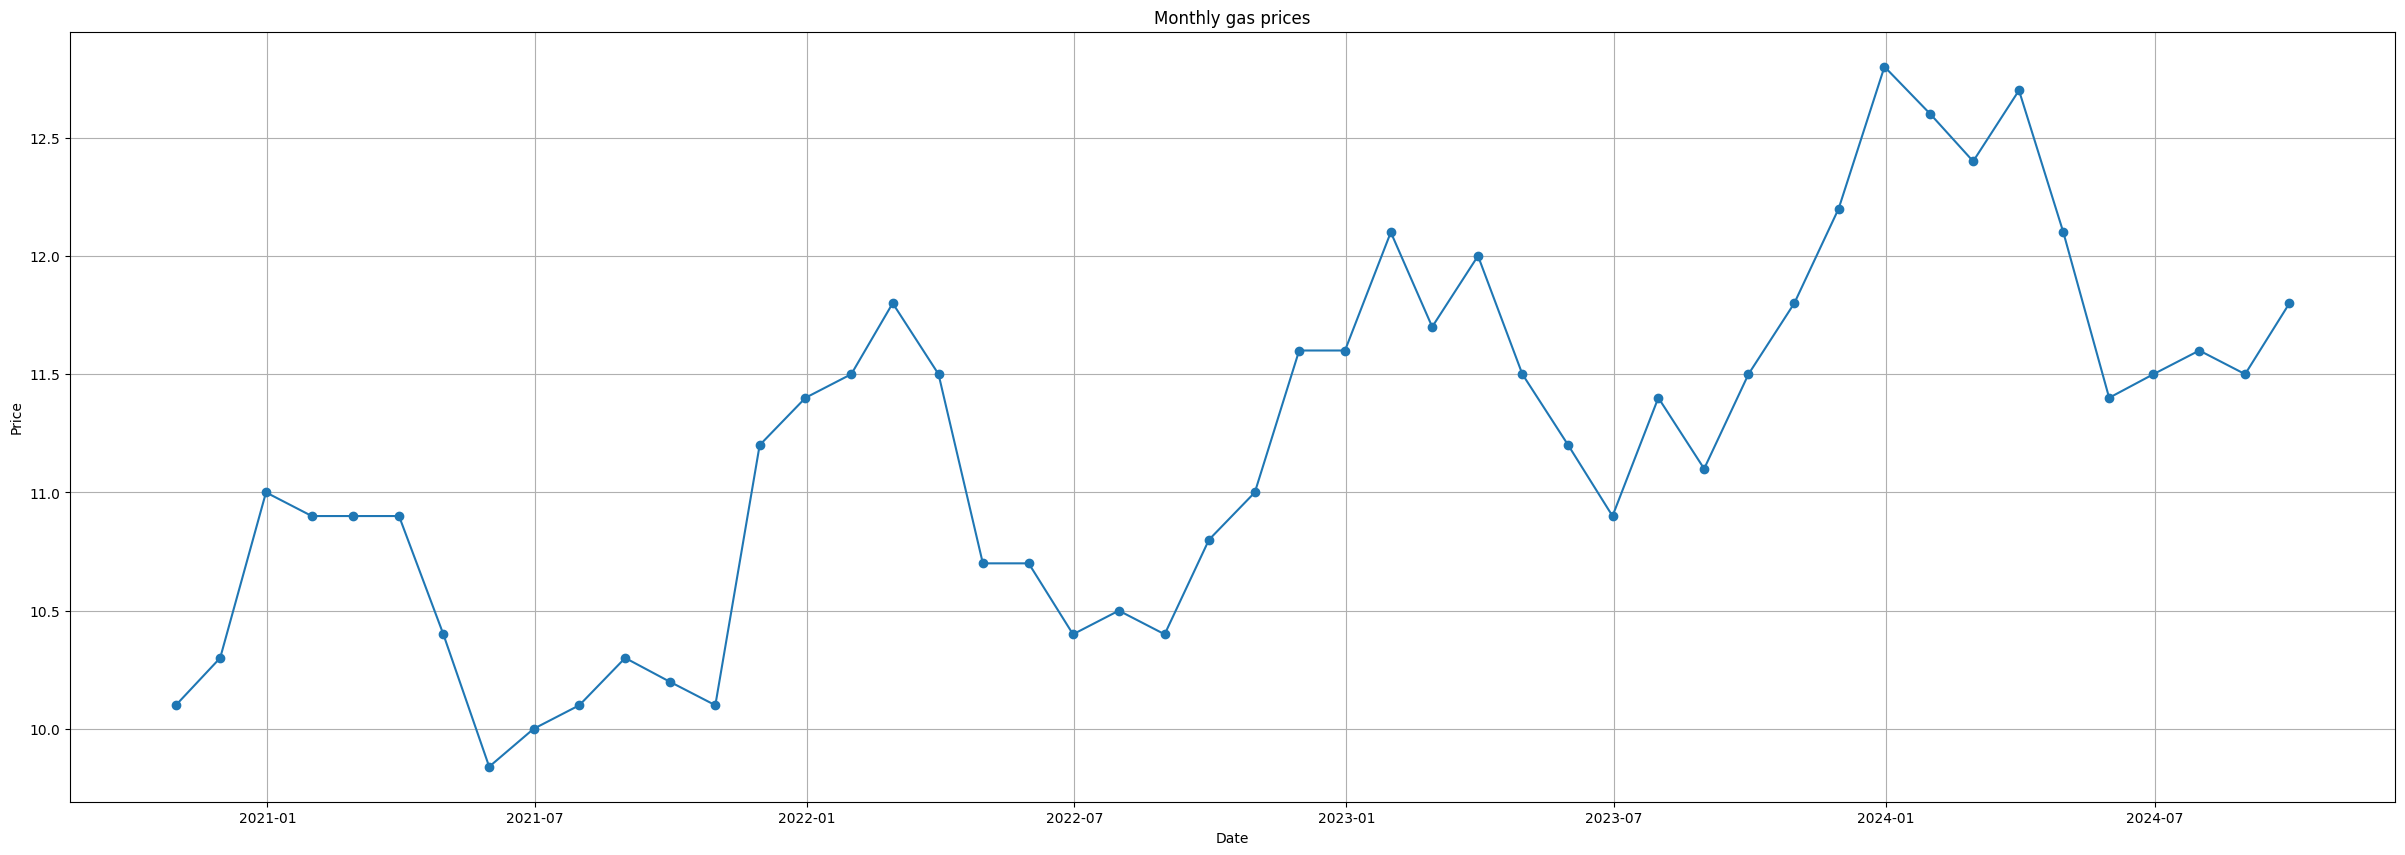

In [250]:
#plotting the data points for visualising

plt.figure(figsize=(30,10))
plt.plot(df.index , df['Prices'], marker='o', linestyle='-')
plt.title("Monthly gas prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [251]:
#Implementing the model SARIMAX with the frequency set to Monthly

df = df.asfreq('M')
train = df.iloc[:-12]   
test = df.iloc[-12:]   


model = SARIMAX(train['Prices'], order =(2,1,2), seasonal_order=(0,1,1,12))
results = model.fit(disp=False)
print(results.summary())

/Users/ashutosh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                               Prices   No. Observations:                   36
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood                  -1.455
Date:                              Sat, 20 Sep 2025   AIC                             14.909
Time:                                      17:14:01   BIC                             21.722
Sample:                                  10-31-2020   HQIC                            16.623
                                       - 09-30-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0660     12.922     -0.082      0.934     -26.392      24.260
ar.L2         -0.06

In [253]:
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)

# Create forecast index starting 1 month after last historical date
forecast_index = pd.date_range(start=train.index[-1] + pd.DateOffset(months=1), 
                               periods=forecast_steps, freq='M')

forecast_df = pd.DataFrame({'Price': forecast.predicted_mean}, index=forecast_index)

print(forecast_df)

                Price
2023-10-31  11.330314
2023-11-30  12.205015
2023-12-31  12.282511
2024-01-31  12.659739
2024-02-29  12.427327
2024-03-31  12.614954
2024-04-30  11.838776
2024-05-31  11.716838
2024-06-30  11.416892
2024-07-31  11.792042
2024-08-31  11.595223
2024-09-30  11.944030


In [256]:
#prints the forecasted values 
print(forecast_df)


                Price
2023-10-31  11.330314
2023-11-30  12.205015
2023-12-31  12.282511
2024-01-31  12.659739
2024-02-29  12.427327
2024-03-31  12.614954
2024-04-30  11.838776
2024-05-31  11.716838
2024-06-30  11.416892
2024-07-31  11.792042
2024-08-31  11.595223
2024-09-30  11.944030


In [259]:
def estimate_price_at_any_point(input_date): 
    df = pd.read_csv('AnalysisprojectAdvayShinde/data/Nat_Gas.csv')
    df.columns = df.columns.str.strip()
    df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')
    df.set_index('Dates', inplace=True)
    df = df.sort_index()

    date = pd.to_datetime(input_date)

    first_date = df.index.min()
    last_date = df.index.max()

    # Align date to end-of-month
    date_aligned = date + pd.offsets.MonthEnd(0)

    if date_aligned < first_date:
        return f"Date {date.date()} is before available data."

    elif date_aligned <= last_date:
        # Interpolate between historical prices
        return float(np.interp(date_aligned.toordinal(),
                               df.index.map(pd.Timestamp.toordinal),
                               df['Prices']))

    else:
        # Forecast future dates
        months_ahead = (date_aligned.year - last_date.year) * 12 + (date_aligned.month - last_date.month)
        forecast = results.get_forecast(steps=months_ahead)
        return float(forecast.predicted_mean.iloc[-1])


In [260]:
print(estimate_price_at_any_point("2022-05-15"))  # Past, within historical
print(estimate_price_at_any_point("2025-03-09"))  # Future, extrapolated
print(estimate_price_at_any_point("2020-01-31"))

10.7
12.614953858279971
Date 2020-01-31 is before available data.


In [265]:
from datetime import datetime
from typing import List, Dict
import calendar
from datetime import timedelta

def contract_pricing(
    injection_dates: List[datetime],
    withdrawal_dates: List[datetime],
    injection_rate: float,
    withdrawal_rate: float,
    max_storage: float,
    prices: Dict[datetime, float],
    storage_cost_per_unit: float,
    volume_per_injection: float,
    volume_per_withdrawal: float
):

    timeline_of_prices = sorted(prices.keys())
    
    adjusted_injection_dates=[]
    for t in injection_dates : 
        
        if(t.weekday() == 5): 
            adjusted_injection_dates.append(t + timedelta(2))
        elif(t.weekday()  == 6) : 
            adjusted_injection_dates.append(t + timedelta(1))
        else : 
           adjusted_injection_dates.append(t)


    adjusted_withdrawl_dates=[]
    for t in withdrawal_dates : 
        
        if(t.weekday() == 5): 
            adjusted_withdrawl_dates.append(t + timedelta(2))
        elif(t.weekday()  == 6) : 
            adjusted_withdrawl_dates.append(t + timedelta(1))
        else : 
           adjusted_withdrawl_dates.append(t)



    all_events = []
    for date in adjusted_injection_dates: 
        all_events.append((date , "inject"))

    for date in adjusted_withdrawl_dates : 
         all_events.append((date, "withdraw"))
    

    all_events.sort(key = lambda x: x[0])


    current_storage= 0.9
    total_value_injection = 0.0
    total_value_withdrawal =0.0
    total_storage_cost= 0.0


    for event_date, action in all_events: 
        price = prices.get(event_date)

        if price is None: 
            continue 


        if action == "inject": 
            if current_storage + volume_per_injection <= max_storage: 
                current_storage = current_storage + volume_per_injection
                total_value_injection +=  volume_per_injection*injection_rate*price

        elif action=="withdraw": 
            if current_storage >= volume_per_withdrawal:
                current_storage -= volume_per_withdrawal
                total_value_withdrawal += volume_per_withdrawal * withdrawal_rate * price
            

        total_storage_cost += current_storage * storage_cost_per_unit 


        contract_price = total_value_withdrawal - total_value_injection - total_storage_cost


        return contract_price
          

In [266]:
from datetime import datetime

prices = {
    datetime(2024, 1, 1): 10.0,
    datetime(2024, 1, 2): 10.5,
    datetime(2024, 1, 3): 11.0,
    datetime(2024, 1, 4): 11.5,
    datetime(2024, 1, 5): 12.0,
}

injection_dates = [datetime(2024, 1, 1), datetime(2024, 1, 2)]
withdrawal_dates = [datetime(2024, 1, 4), datetime(2024, 1, 5)]

contract_value = contract_pricing(
    injection_dates=injection_dates,
    withdrawal_dates=withdrawal_dates,
    injection_rate=1.0,
    withdrawal_rate=1.0,
    max_storage=10.0,
    prices=prices,
    storage_cost_per_unit=0.1,
    volume_per_injection=5.0,
    volume_per_withdrawal=5.0
)

print("Contract Value:", contract_value)


Contract Value: -50.59
